# Global mean Sea Surface Temperatures

Create the following data files in netcdf format

**sst** - SST monthly mean (time: 492,lat: 720,lon: 1440)

**sst_Wmean** - SST weighted global mean (time)

**sst_Clim** - monthly climatology (month: 12lat: 720lon: 1440)

**sst_anom** - anomaly from monthly Climatology (time: 492, lat: 720,lon: 1440)

**sst_anom_Wmean** - SST anomlay weighted global mean (time: 492)


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter

plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [32]:
#To compute de climatoloy
year1='1982'
year2='1992'
year2='1984'

## Load data

In [111]:
base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
#base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'

files = [f'{base_file}.{year}.nc' for year in range(1982, 1985)]
DS = xr.open_mfdataset(files)

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = DS.sst.sel(lat=slice(0,88))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = DS.sst.sel(lat=slice( -88, 0))

titulo_short = 'GO'
titulo = 'Global Ocean'
sst = DS.sst.sel(lat=slice( -88, 88))

#titulo_short = 'NTenerife'
#titulo = 'North Tenerife'
#sst = DS.sst.sel(lon=slice(360-16.,360-15.),lat=slice(28.50,28.75))

## Global mean
(weigthed)

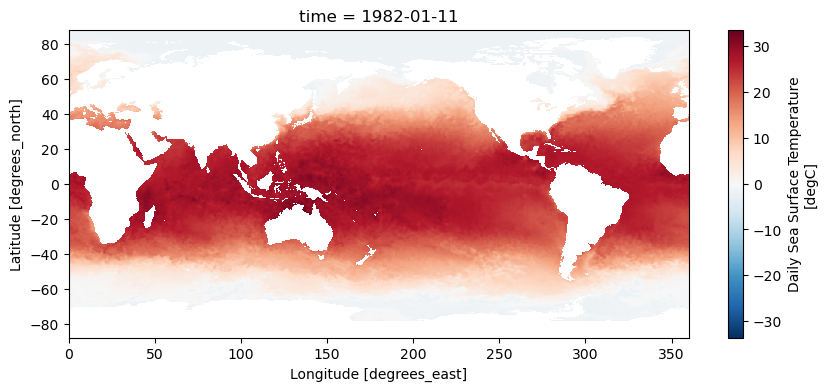

In [115]:
sst[10,:,:].plot()

In [107]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)
sst_Wmean = sst_weighted.mean(("lon", "lat"),skipna=True).load()

In [110]:
sst.weighted?

Signature: sst.weighted(weights: 'DataArray') -> 'DataArrayWeighted'
Docstring:
Weighted DataArray operations.

Parameters
----------
weights : DataArray
    An array of weights associated with the values in this Dataset.
    Each value in the data contributes to the reduction operation
    according to its associated weight.

Notes
-----
``weights`` must be a DataArray and cannot contain missing values.
Missing values can be replaced by ``weights.fillna(0)``.

Returns
-------
core.weighted.DataArrayWeighted

See Also
--------
Dataset.weighted
File:      ~/miniconda3/envs/Ocean/lib/python3.11/site-packages/xarray/core/dataarray.py
Type:      method

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [67]:
#Create monthly climatology
sst_Clim = sst.sel(time=slice(year1,year2)).groupby('time.dayofyear').mean(dim='time').load();

In [68]:
#Create anomaly
sst_anom = sst.groupby('time.dayofyear') - sst_Clim

## Global mean anomaly

In [86]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights.name = "weights"
sst_anom_weighted = sst_anom.weighted(weights)
sst_anom_Wmean = sst_anom_weighted.mean(("lon", "lat"),skipna=True).load()

In [87]:
# smoothed versions
sst_Wmean_Y = sst_Wmean.resample(time='1m').mean(dim='time',skipna=True)
sst_Wmean_rolling = sst_Wmean.rolling(time=360,center=True).mean()
sst_anom_Wmean_Y = sst_anom_Wmean.resample(time='1m').mean(dim='time',skipna=True)
sst_anom_Wmean_rolling = sst_anom_Wmean.rolling(time=360,center=True).mean()

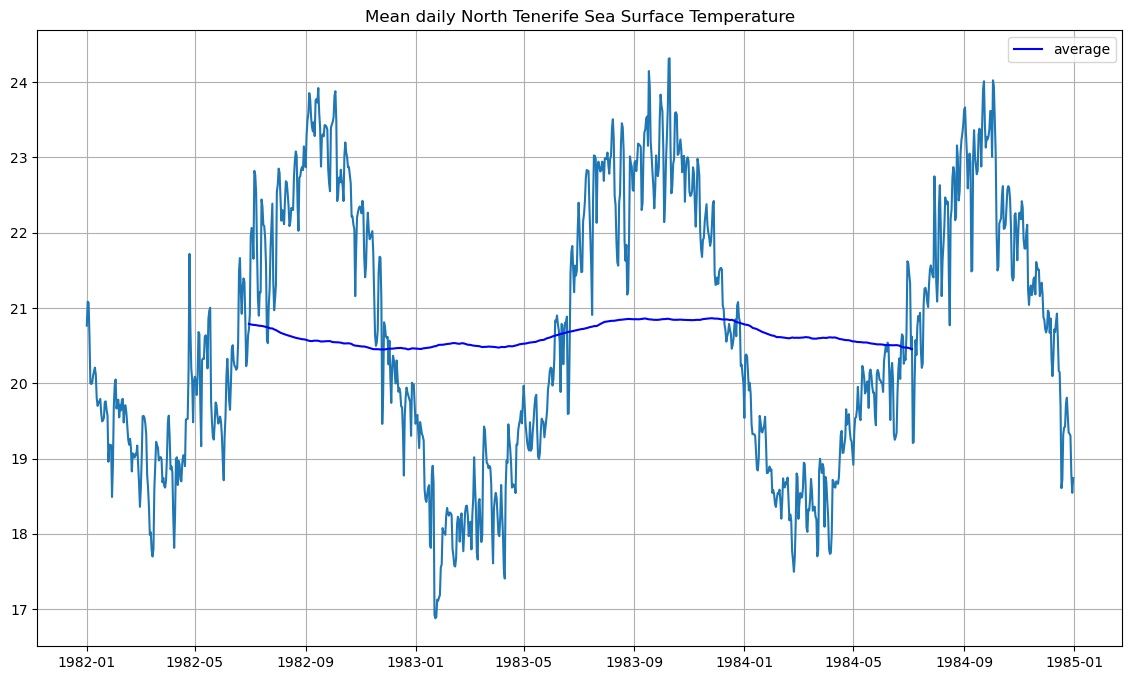

In [88]:
fig, ax = plt.subplots(1, 1 , figsize=(14,8))
ax.plot(sst_Wmean.time,sst_Wmean)
#ax.plot(sst_Wmean_Y.time,sst_Wmean_Y,'-b',label='Yearly')
ax.plot(sst_Wmean_rolling.time,sst_Wmean_rolling,'-b',label='average')
ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature');

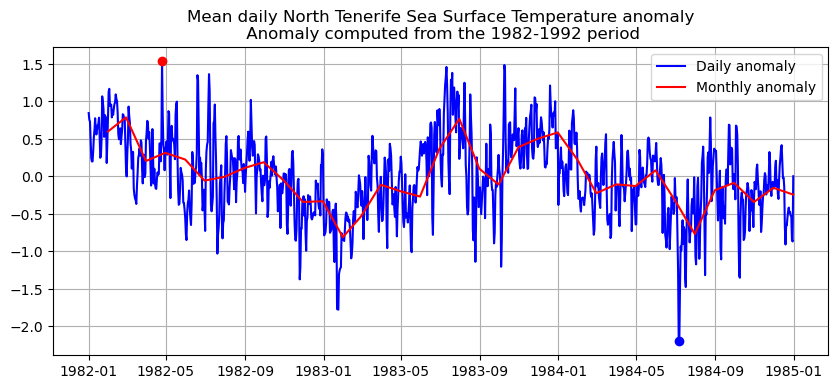

In [89]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sst_anom_Wmean.time        ,sst_anom_Wmean,'b',label='Daily anomaly')
ax.plot(sst_anom_Wmean_Y.time      ,sst_anom_Wmean_Y,'r',label='Monthly anomaly')
#ax.plot(sst_anom_Wmean_rolling.time,sst_anom_Wmean_rolling,'r')

ax.plot(sst_anom_Wmean.time.isel(sst_anom_Wmean.argmax(...)),
        sst_anom_Wmean.isel(sst_anom_Wmean.argmax(...)),'ro')
ax.plot(sst_anom_Wmean.time.isel(sst_anom_Wmean.argmin(...)),
        sst_anom_Wmean.isel(sst_anom_Wmean.argmin(...)),'bo')

ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature anomaly\n Anomaly computed from the 1982-1992 period');

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 366)

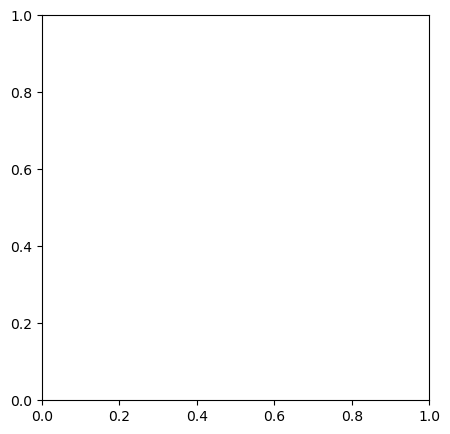

In [73]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(sst_Clim.mean(dim='lon').dayofyear,
                 sst_Clim.mean(dim='lon').lat,
                 sst_Clim.mean(dim='lon').transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + year1 + '-' + year2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

In [74]:
sst_Wmean.to_netcdf('sstd_'+titulo_short+'mean.nc')
sst_anom_Wmean.to_netcdf('sstd_anom_'+titulo_short+'mean.nc')

In [ ]:
Titulos = ['Oceano Global','Northern Hemisphere']
Titulos_short = ['GO','NH']

In [ ]:
for i in range(0,len(Titulos)):
    titulo = Titulos[i]
    titulo_short = Titulos_short[i]
    
    if titulo_short=='NH':
        sst = DS.sst.sel(lat=slice(0,88))
        print(titulo)
    elif titulo_short=='SH':
        sst = DS.sst.sel(lat=slice( -88, 0))
        print(titulo)
    elif titulo_short=='GO':
        sst = DS.sst.sel(lat=slice( -88, 88))
        print(titulo)
    elif titulo_short=='NTenerife':
        sst = DS.sst.sel(lon=360-16.1188,lat=28.5559,method='nearest')
        print(titulo)

In [ ]:
sst